**Deutsch-Jozsa algorithm**

### 🔍 Problem It Solves

You are given a **black-box function** `f(x)` that takes an `n`-bit input and returns either `0` or `1`. You are promised that the function is:

* **Constant**: returns the same output for all inputs (always `0` or always `1`), or
* **Balanced**: returns `0` for exactly half of the inputs and `1` for the other half.

🧠 **Goal**: Determine whether `f(x)` is constant or balanced, using as few evaluations as possible.

### ⚙️ How the Algorithm Works (High-Level Steps)

Let’s assume `n` input qubits (for `x`) and 1 output qubit (for `f(x)`).

1. **Initialize** the system:

   * Input qubits: |0⟩ⁿ → `|000...0⟩`
   * Output qubit: |1⟩

2. **Apply Hadamard gates** to all qubits:

   * Input qubits become a superposition of all possible values of `x`
   * Output qubit becomes: (|0⟩ - |1⟩)/√2

3. **Apply the oracle** (a quantum version of `f(x)`):

   * It flips the sign of the amplitude of states where `f(x) = 1`
   * Mathematically: `|x⟩|y⟩ → |x⟩|y ⊕ f(x)⟩`

4. **Apply Hadamard again** to the input qubits.

5. **Measure the input qubits**:

   * If the result is all zeros (`|0...0⟩`), `f(x)` is **constant**
   * Otherwise, `f(x)` is **balanced**

---

### ✨ Why It Works

The Hadamard gates exploit quantum parallelism. When the oracle applies `f(x)` across the superposition, the amplitudes interfere constructively or destructively depending on whether `f(x)` is constant or balanced.

This interference lets you **extract global information about `f(x)`** with just **one query**—something that’s not possible classically.

---

### 🧪 Example (n = 1)

* If `f(0) = f(1)` → constant
* If `f(0) ≠ f(1)` → balanced

Quantum circuit:

```
|0⟩ --H--●--H-- Measure
         |
|1⟩ --H--⊕-----
```

$$
U_f |X⟩|y⟩ = |X⟩|y \oplus f(X)\rangle, where X \in \{0,1\}^n
$$
> aka multi qubits

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [19]:
X_qubits = 4

y_qubit = 1

n_qubits = X_qubits+y_qubit

In [20]:
qc = QuantumCircuit(n_qubits, X_qubits)
qc.x(X_qubits)

qc.h(range(n_qubits))

qc.barrier()
qc.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_4: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 4/═════════════

$$
|\psi\rangle = \frac{1}{\sqrt{2^n}} \sum_{X \in \{0,1\}^n} (-1)^{f(x)} |x\rangle (\frac{|0\rangle - |1\rangle}{\sqrt{2}})
$$

In [21]:
# our bit string '1010' by placing X gate with the set bit and identity gate when none is there
qc.id(0)
qc.x(1)
qc.id(2)
qc.x(3)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─
     └───┘└───┘ ░       ░ 
c: 4/═════════════════════

In [22]:
# our oracle we will set it to a balanced output where all outputs should be 1s with zero prob of 0s by adding CNOT and set target to last bit so that phase shift can happen
qc.cx([_ for _ in range(X_qubits)], X_qubits)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─
     ├───┤      ░ ├───┤ ░   │                  ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─
     ├───┤      ░ ├───┤ ░   │    │             ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░ 
c: 4/════════════════════════════════════════════

In [23]:
qc.id(0)
qc.x(1)
qc.id(2)
qc.x(3)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░ 
c: 4/════════════════════════════════════════════════════

In [24]:
qc.h([_ for _ in range(X_qubits)])
qc.barrier()
qc.measure(range(X_qubits), range(X_qubits))
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─┤ H ├─░─┤M├─────────
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                  0  1  2  3

In [25]:
from qiskit.visualization import plot_histogram

{'1111': 1024}


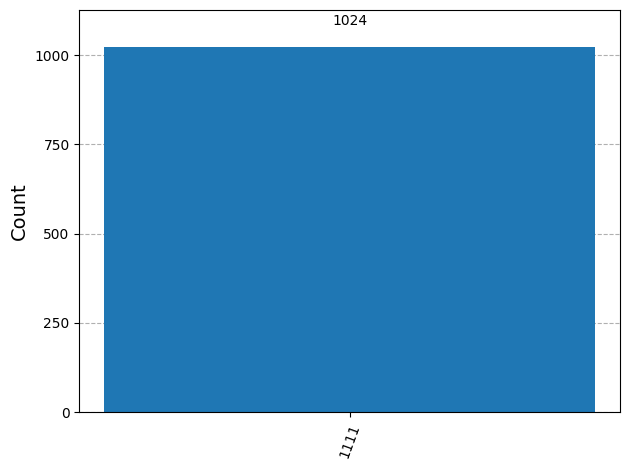

In [26]:
res = AerSimulator().run(qc, shots=1024).result()
counts = res.get_counts()
print(counts)
plot_histogram(counts)

In [27]:
from ibmq import IBMQClient

ibm_client = IBMQClient()

Least busy backend: ibm_sherbrooke
Job ID is d0gbjrkfbx30008w1bz0


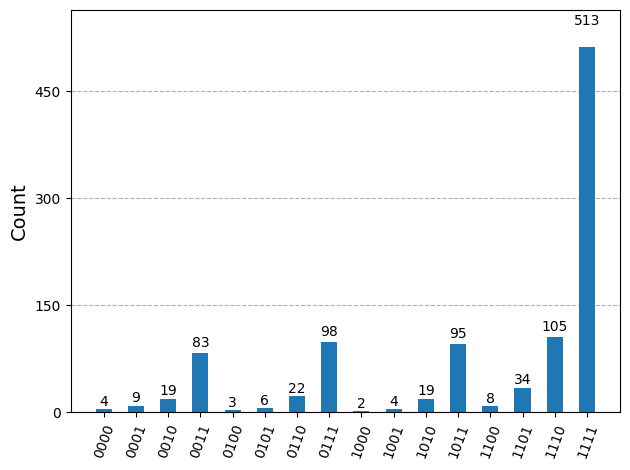

In [29]:
res = ibm_client.execute(qc, 1024)
plot_histogram(res[0].data['c'].get_counts())